### Analysis of hardware utilization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# Function to count tuples in a list of lists
def count_tuples(schedules):
    return sum(len(task) for task in schedules)

In [1]:
def calculate_utilization(n_partitions, n_microbatches):    
    schedules = []
    n_clock_cycles = n_partitions + n_microbatches - 1
    for clock_idx in range(n_clock_cycles):
        start_partition = max(clock_idx + 1 - n_microbatches, 0)
        end_partition = min(clock_idx + 1, n_partitions)
        tasks = []
        for partition_idx in range(start_partition, end_partition):
            microbatch_idx = clock_idx - partition_idx
            tasks.append((microbatch_idx, partition_idx))
        schedules.append(tasks)
        
    utilization = (count_tuples(schedules) / (n_clock_cycles * n_partitions)) * 100
    return utilization

In [ ]:
number of actives gpus through out the entire training of gpipe / the number of possible active gpus through training

### As a function of both number of microbatches and pipeline stages

In [11]:
n_microbatches_range = np.linspace(10, 100, 10, dtype=int)
n_partitions_range = np.linspace(1, 10, 10, dtype=int)
X, Y = np.meshgrid(n_microbatches_range, n_partitions_range)

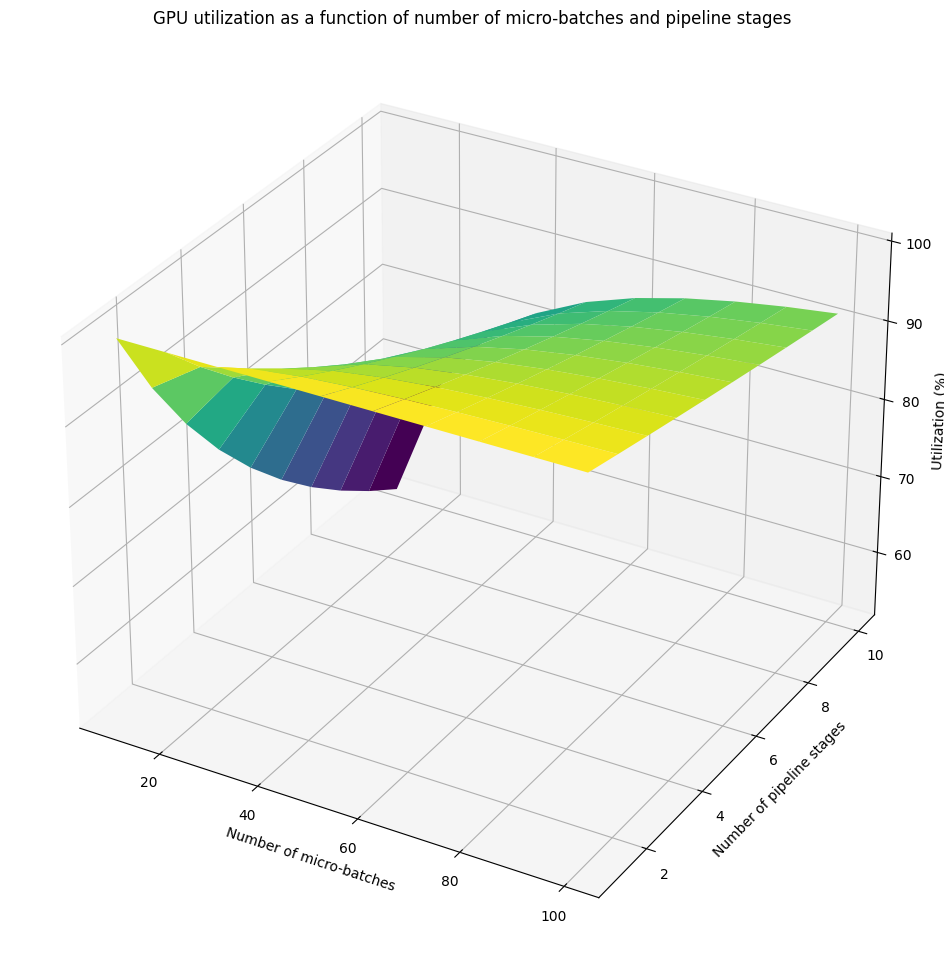

In [23]:
Z = np.zeros_like(X, dtype=float)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = calculate_utilization(Y[i, j], X[i, j])

# Plotting the new 3D surface graph
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Number of micro-batches')
ax.set_ylabel('Number of pipeline stages')
ax.set_zlabel('Utilization (%)')
ax.set_title('GPU utilization as a function of number of micro-batches and pipeline stages')
plt.show()

### As a function of number of microbatches

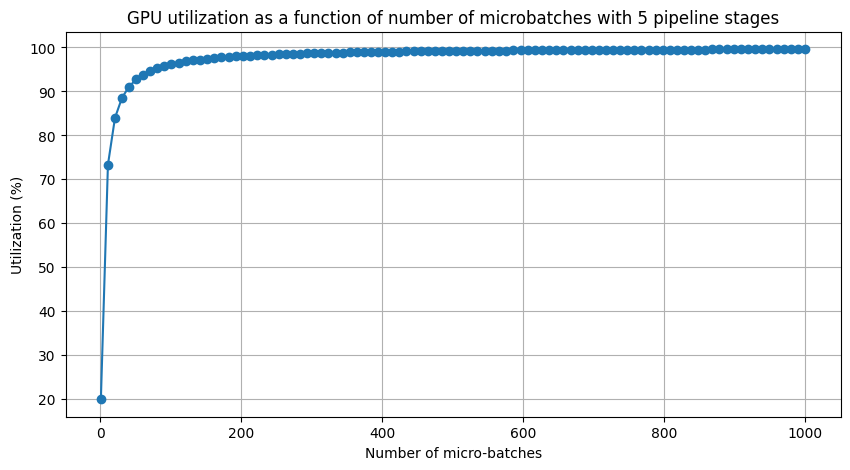

In [18]:
# Fix n_partitions to 5 and vary n_microbatches from 0 to 1000
n_partitions_fixed = 5
n_microbatches_range_2d = np.linspace(1, 1000, 100, dtype=int)

# Calculate utilization for this specific case
utilization_2d = [calculate_utilization(n_partitions_fixed, mb) for mb in n_microbatches_range_2d]

# Plotting the 2D graph
plt.figure(figsize=(10, 5))
plt.plot(n_microbatches_range_2d, utilization_2d, marker='o')
plt.xlabel('Number of micro-batches')
plt.ylabel('Utilization (%)')
plt.title('GPU utilization as a function of number of microbatches with 5 pipeline stages')
plt.grid(True)
plt.show()